<a href="https://colab.research.google.com/github/smitapatil1/Assignments-Decision-Trees/blob/main/Assignments_%3E_Decision_Trees_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder#for encoding
from sklearn.model_selection import train_test_split#for train test splitting
from sklearn.tree import DecisionTreeClassifier#for decision tree object
from sklearn.metrics import classification_report, confusion_matrix#for checking testing results
from sklearn.tree import plot_tree#for visualizing tree

In [5]:
#reading the data
df = pd.read_csv('/content/Fraud_check.csv')
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [6]:
#getting information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [7]:
df.isnull().any()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

In [14]:
df.columns

Index(['Taxable.Income', 'City.Population', 'Work.Experience', 'Undergrad_YES',
       'Marital.Status_Married', 'Marital.Status_Single', 'Urban_YES'],
      dtype='object')

In [15]:
#Creating dummy vairables for ['Undergrad','Marital.Status','Urban'] dropping first dummy variable
df=pd.get_dummies(df,columns=['Undergrad_YES','Marital.Status_Single','Urban_YES'], drop_first=True)

In [16]:
df

,Taxable.Income,City.Population,Work.Experience,Marital.Status_Married,Undergrad_YES_1,Marital.Status_Single_1,Urban_YES_1
0,68833,50047,10,0,0,1,1
1,33700,134075,18,0,1,0,1
2,36925,160205,30,1,0,0,1
3,50190,193264,15,0,1,1,1
4,81002,27533,28,1,0,0,0
...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,0,1
596,69967,55369,2,0,1,0,1
597,47334,154058,0,0,0,0,1
598,98592,180083,17,1,1,0,0


In [17]:
#Creating new cols TaxInc and dividing 'Taxable.Income' cols on the basis of [10002,30000,99620] for Risky and Good
df["TaxInc"] = pd.cut(df["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])
print(df)

     Taxable.Income  City.Population  Work.Experience  Marital.Status_Married  \
0             68833            50047               10                       0   
1             33700           134075               18                       0   
2             36925           160205               30                       1   
3             50190           193264               15                       0   
4             81002            27533               28                       1   
..              ...              ...              ...                     ...   
595           76340            39492                7                       0   
596           69967            55369                2                       0   
597           47334           154058                0                       0   
598           98592           180083               17                       1   
599           96519           158137               16                       0   

     Undergrad_YES_1  Marit

Lets assume: taxable_income <= 30000 as “Risky=0” and others are “Good=1”

In [18]:
#After creation of new col. TaxInc also made its dummies var concating right side of df
df = pd.get_dummies(df,columns = ["TaxInc"],drop_first=True)

In [19]:
df

,Taxable.Income,City.Population,Work.Experience,Marital.Status_Married,Undergrad_YES_1,Marital.Status_Single_1,Urban_YES_1,TaxInc_Good
0,68833,50047,10,0,0,1,1,1
1,33700,134075,18,0,1,0,1,1
2,36925,160205,30,1,0,0,1,1
3,50190,193264,15,0,1,1,1,1
4,81002,27533,28,1,0,0,0,1
...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,0,1,1
596,69967,55369,2,0,1,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1


In [36]:
# Normalization function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [37]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(df.iloc[:,1:])
df_norm.tail(10)

,City.Population,Work.Experience,Marital.Status_Married,Undergrad_YES_1,Marital.Status_Single_1,Urban_YES_1,TaxInc_Good
590,0.341473,0.466667,1.0,0.0,0.0,1.0,1.0
591,0.615406,0.600000,0.0,1.0,1.0,1.0,0.0
592,0.283703,0.533333,0.0,1.0,1.0,0.0,1.0
593,0.610256,0.333333,0.0,0.0,0.0,1.0,1.0
594,0.412341,0.300000,1.0,0.0,0.0,1.0,1.0
595,0.078811,0.233333,0.0,1.0,0.0,1.0,1.0
596,0.170058,0.066667,0.0,1.0,0.0,1.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0,1.0
599,0.760683,0.533333,0.0,0.0,0.0,0.0,1.0


In [38]:
# Declaring features & target
x = df_norm.drop(['TaxInc_Good'], axis=1)
y = df_norm['TaxInc_Good']

In [39]:
x

,City.Population,Work.Experience,Marital.Status_Married,Undergrad_YES_1,Marital.Status_Single_1,Urban_YES_1
0,0.139472,0.333333,0.0,0.0,1.0,1.0
1,0.622394,0.600000,0.0,1.0,0.0,1.0
2,0.772568,1.000000,1.0,0.0,0.0,1.0
3,0.962563,0.500000,0.0,1.0,1.0,1.0
4,0.010081,0.933333,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
595,0.078811,0.233333,0.0,1.0,0.0,1.0
596,0.170058,0.066667,0.0,1.0,0.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0


In [40]:
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
595    1.0
596    1.0
597    1.0
598    1.0
599    1.0
Name: TaxInc_Good, Length: 600, dtype: float64

In [48]:
from sklearn.model_selection import train_test_split
# Splitting data into train & test
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)

# Building Decision Tree Classifier using Entropy Criteria

In [49]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(Xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [50]:
colnames = list(df.columns)
colnames

['Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Marital.Status_Married',
 'Undergrad_YES_1',
 'Marital.Status_Single_1',
 'Urban_YES_1',
 'TaxInc_Good']

In [51]:
from sklearn import tree


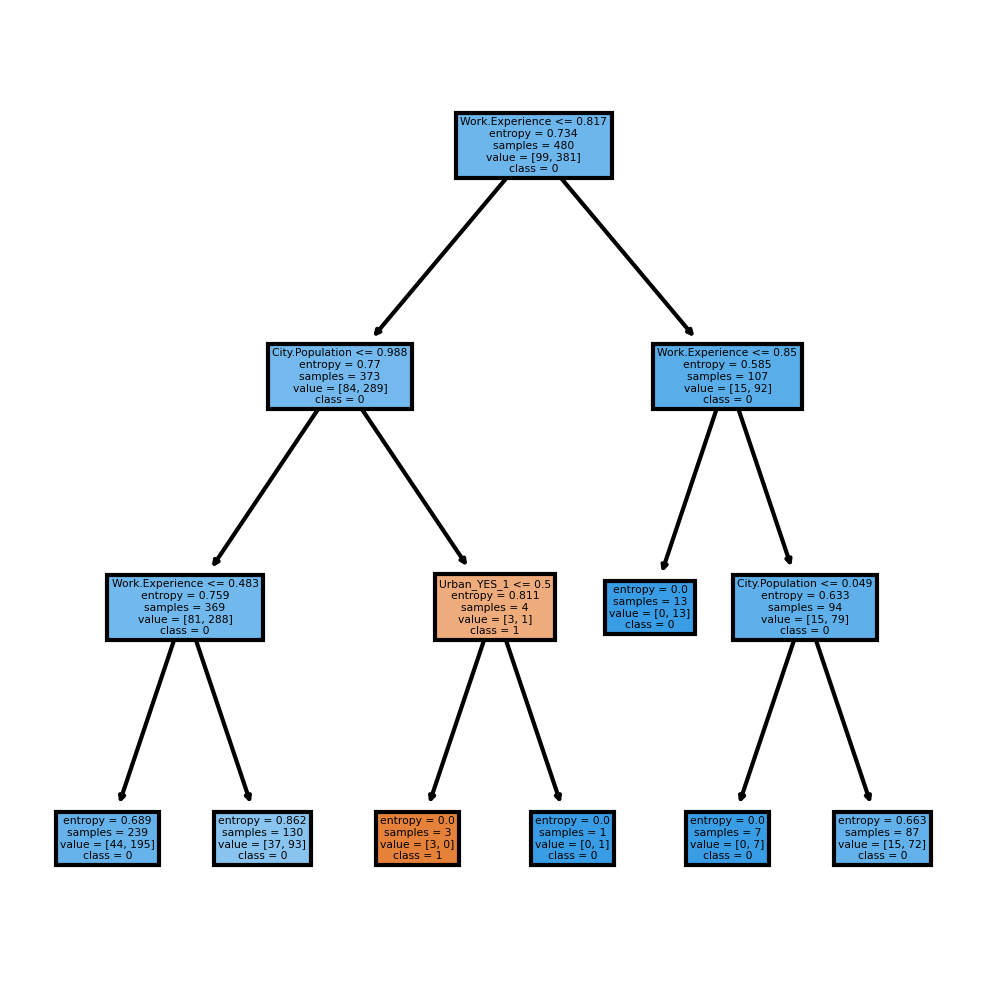

In [52]:
fn=['City.Population','Work.Experience','Undergrad_YES_1','Marital.Status_Married','Marital.Status_Single_1','Urban_YES_1']
cn=['1', '0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);


In [55]:
#Predicting on test data
preds = model.predict(Xtest) # predicting on test data set
pd.Series(preds).value_counts() # getting the count of each category

1.0    119
0.0      1
dtype: int64

In [56]:
preds

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [58]:
pd.crosstab(ytest,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0.0,1.0
TaxInc_Good,,
0.0,0,25
1.0,1,94


In [60]:
# Accuracy
np.mean(preds==ytest)

0.7833333333333333

# Building Decision Tree Classifier (CART) using Gini Criteria

In [61]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [64]:
model_gini.fit(Xtrain, ytrain)

DecisionTreeClassifier(max_depth=3)

In [66]:
#Prediction and computing the accuracy
pred=model.predict(Xtest)
np.mean(preds==ytest)

0.7833333333333333

# Decision Tree Regression Example

In [67]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [68]:
array = df.values
X = array[:,0:3]
y = array[:,3]

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [70]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [71]:
#Find the accuracy
model.score(X_test,y_test)

-1.008628731343284